# **Experiment using Common Machine Learning Library**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('../data/processed/train_titanic.csv')

In [3]:
df

,Survived,Age,SibSp,Parch,Fare,FamilySize,Family,Child,Female,Male,...,Class_2,Class_3,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,0,22.0,1,0,7,2,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
1,1,38.0,1,0,71,2,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,1,26.0,0,0,7,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
3,1,35.0,1,0,53,2,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
4,0,35.0,0,0,8,1,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
5,0,28.0,0,0,8,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
6,0,54.0,0,0,51,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
7,0,2.0,3,1,21,5,1,1,0,0,...,0,1,0,0,1,1,0,0,0,0
8,1,27.0,0,2,11,3,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
9,1,14.0,1,0,30,2,1,1,0,0,...,1,0,1,0,0,0,0,0,0,1


In [4]:
X = df.drop(['Survived'], axis=1).values
y = df['Survived'].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

## **Scikit-Learn**

In [14]:
mlp = MLPClassifier(solver='sgd', activation='logistic', random_state=1, batch_size=10, learning_rate_init=0.01, max_iter=100, hidden_layer_sizes=(3,))

In [15]:
mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size=10, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(6, 3), learning_rate='constant',
              learning_rate_init=0.01, max_iter=100, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

#### Training accuracy score

In [16]:
mlp.score(X_train, y_train)

0.6573033707865169

#### Test accuracy score

In [17]:
pred = mlp.predict(X_test)
accuracy_score(y_test,pred)

0.6759776536312849

## **PyTorch**

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim

In [11]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(6, 6)
        self.sig1 = nn.Sigmoid()
        self.fc2 = nn.Linear(6, 6)
        self.sig2 = nn.Sigmoid()
        self.fc3 = nn.Linear(6, 1)
        self.sig3 = nn.Sigmoid()

    def forward(self, x):
        a1 = self.fc1(x)
        h1 = self.sig1(a1)
        a2 = self.fc2(h1)
        h2 = self.sig2(a2)
        a3 = self.fc3(h2)
        y = self.sig3(a3)
        return y

In [12]:
net = Net()
opt = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))
criterion = nn.MSELoss()

In [13]:
import random
def train_epoch(model, opt, criterion, batch_size=4):
    model.train()
    losses = []
    for batch_idx in np.random.choice(len(list(X)), batch_size):
        x_batch = Variable(torch.FloatTensor(np.array(X[batch_idx])))
        y_batch = Variable(torch.FloatTensor(np.array([y[batch_idx]])))
        opt.zero_grad()
        # (1) Forward
        y_hat = model(x_batch)
        # (2) Compute diff
        loss = criterion(y_hat, y_batch)
        # (3) Compute gradients
        loss.backward()
        # (4) update weights
        running_loss = loss.data.numpy()
    losses.append(running_loss / batch_size)
    return losses

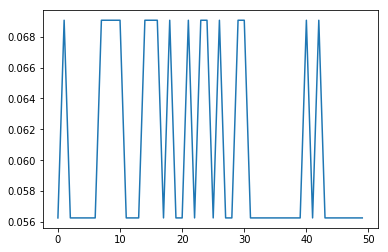

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
e_losses = []
num_epochs = 50
for e in range(num_epochs):
    e_losses += train_epoch(net, opt, criterion)
plt.plot(e_losses)

In [15]:
test = Variable(torch.FloatTensor(np.array(X_test)))
pred =net(test)

In [16]:
pred = pred.flatten().detach().numpy()
prediction = [1 if x>=0.5 else 0 for x in pred]

In [17]:
y_test

array([1, 0, 1])

In [18]:
prediction

[1, 1, 1]

In [19]:
accuracy_score(y_test,prediction)

0.6666666666666666